# 🎯Objetivo: Entrenar un modelo para reconocer letras manuscritas basándose en atributos numéricos extraídos.

Pasos sugeridos:

* Descargar el dataset desde UCI o Kaggle (les puedes dar el link).

* Cargarlo con pandas, explorar dimensiones y clases.

* Entrenar al menos dos modelos distintos (por ejemplo Random Forest y SVM).

* Evaluar con accuracy y matriz de confusión.

* (Opcional) Mostrar qué letras se confunden más.



In [1]:
# Paso 1: Importar librerías
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Paso 2: Cargar el dataset desde un archivo CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columnas = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar',
            'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

data = pd.read_csv(url, header=None, names=columnas)


In [3]:
# Paso 3: Exploración inicial
print("Dimensiones:", data.shape)
print("Clases únicas:", data['letter'].unique())
print("Distribución de clases:")
print(data['letter'].value_counts())


Dimensiones: (20000, 17)
Clases únicas: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']
Distribución de clases:
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [4]:
# Paso 4: Preparar los datos para entrenamiento
X = data.drop('letter', axis=1)
y = data['letter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [5]:
# Paso 5: Entrenar un modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Paso 6: Evaluar el modelo
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9676

Reporte de clasificación:
              precision    recall  f1-score   support

           A       0.99      0.98      0.99       197
           B       0.94      0.97      0.95       192
           C       0.97      0.96      0.96       184
           D       0.93      0.99      0.95       201
           E       0.95      0.97      0.96       192
           F       0.95      0.97      0.96       194
           G       0.95      0.94      0.95       193
           H       0.93      0.89      0.91       183
           I       0.96      0.95      0.96       189
           J       0.96      0.96      0.96       187
           K       0.95      0.95      0.95       185
           L       0.99      0.97      0.98       190
           M       0.98      0.98      0.98       198
           N       0.99      0.95      0.97       196
           O       0.97      0.97      0.97       188
           P       0.98      0.96      0.97       201
           Q       0.95      0.98    

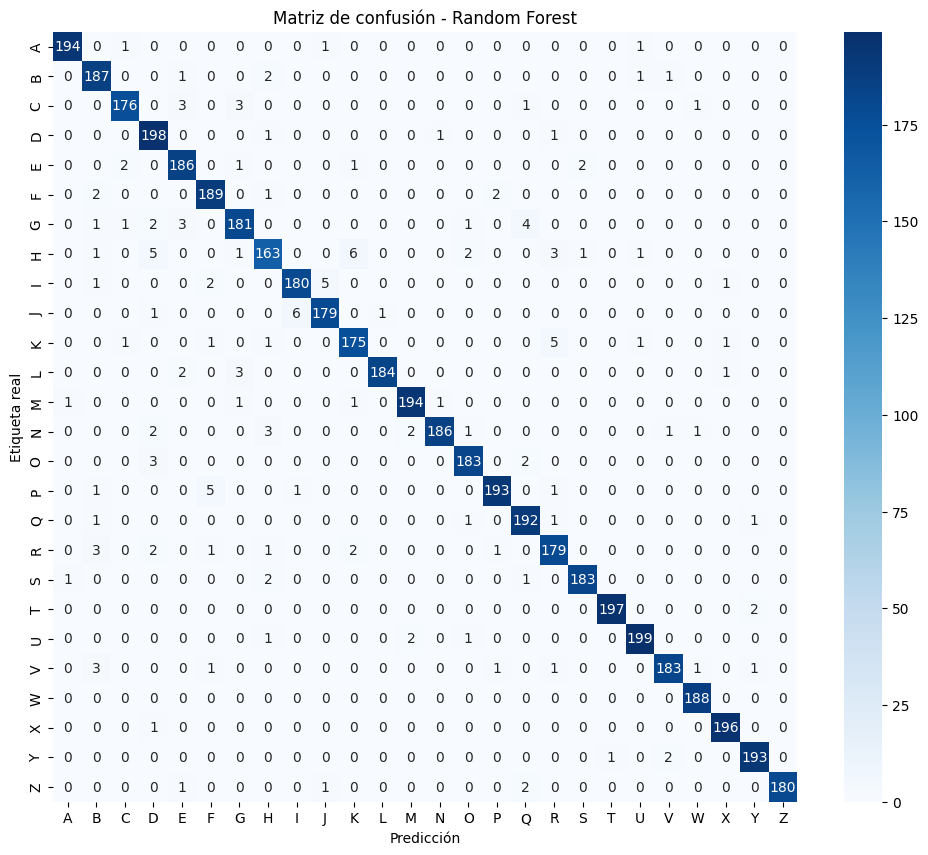

In [7]:
# Paso 7: Matriz de confusión
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred, labels=sorted(data['letter'].unique()))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(data['letter'].unique()),
            yticklabels=sorted(data['letter'].unique()))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión - Random Forest")
plt.show()


# 🎯 Objetivo: Subir imagen manuscrita de una letra y predecir con modelo entrenado
✅ Asumimos que:
* La letra manuscrita se escribe en fondo blanco con marcador oscuro.

* Se procesa la imagen para reducirla a una resolución de 16 features (por ejemplo, 4x4 u 8x2 combinaciones simples).

* Se extraen estadísticas simples (intensidad promedio por bloque) para convertir en características numéricas.

Saving letra A manuscrita.jpg to letra A manuscrita.jpg


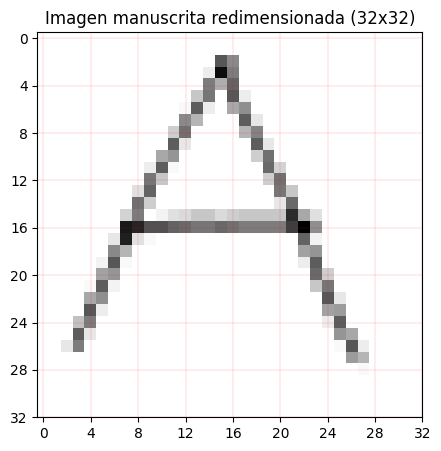

In [42]:
# Paso 1: Subir una imagen manuscrita (fondo blanco, letra oscura)
# Paso 3: Subir y visualizar la imagen manuscrita con marco y escala

from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Subir imagen
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Leer la imagen en escala de grises y redimensionar
img = Image.open(image_path).convert('L')
img_resized = img.resize((32, 32))  # Redimensionar a 32x32 para dividir en bloques 4x4

# Visualización con borde y escala
plt.figure(figsize=(5, 5))
plt.imshow(img_resized, cmap='gray', interpolation='nearest')
plt.title("Imagen manuscrita redimensionada (32x32)")
plt.axis('on')  # Mostrar ticks para ver dimensiones

# Agregar líneas para marcar los bordes
plt.xticks(np.arange(0, 33, 4))
plt.yticks(np.arange(0, 33, 4))
plt.grid(color='red', linewidth=0.1)
plt.show()


In [43]:
import numpy as np
from PIL import Image

# Supongamos que ya tenés la imagen cargada como 'img' y redimensionada a 32x32
# img_resized = img.convert('L').resize((32, 32))

img_array = np.array(img_resized)

# Invertimos los colores: fondo negro, letra blanca
img_inverted = 255 - img_array

features = []

# Dividimos la imagen 32x32 en 4x4 bloques (cada bloque de 8x8 píxeles)
for i in range(4):
    for j in range(4):
        block = img_inverted[i*8:(i+1)*8, j*8:(j+1)*8]
        block_mean = np.mean(block)  # ahora letra blanca = valor alto
        features.append(block_mean)

# Normalizamos los valores a rango similar al dataset (0-15)
features = np.array(features)
features = (features / features.max()) * 15

print("Forma del vector de características:", features.shape)  # (16,)


Forma del vector de características: (16,)


In [44]:
# Paso 5: Predicción
features = features.reshape(1, -1)
pred = model.predict(features)
print("🔤 Predicción del modelo:", pred[0])


🔤 Predicción del modelo: T


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
